In [2]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
def f(x):
    pos=np.floor((x-8)/5.4)
    if x<=8:
        return x
    elif pos%2==0:
        return 8+pos/2*5.4
    else:
        return x-((pos-1)/2+1)*5.4

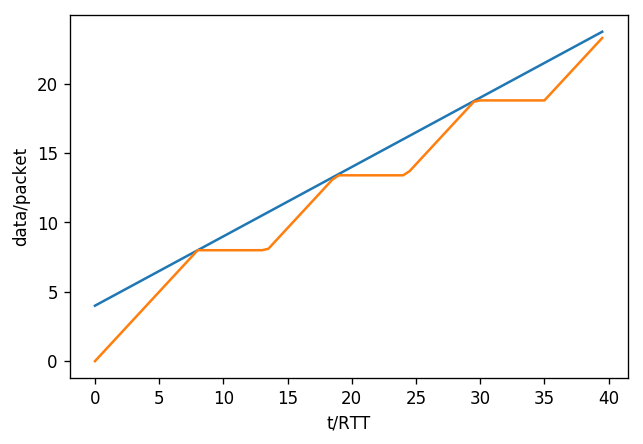

In [20]:
%matplotlib inline
x=list([0.1*i for i in range(0,400,5)])
y=[f(i) for i in x]
g=plt.figure()
plt.plot(x,[4+i/2 for i in x],\
         alpha=1.0)
plt.plot(x,y)
plt.xlabel('t/RTT')
plt.ylabel('data/packet')
g.dpi=120